In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


df = pd.read_csv('kc_house_data.csv')
df.head()

df = df.replace('?' , np.nan)
df['age'] = 2019-df['yr_built']

In [3]:
#THIS IS My Regression

X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'grade', 'sqft_living15', 'sqft_lot15', 'age']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['price']

X = sm.add_constant(X) # adding a constant

model1 = sm.OLS(Y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     3892.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        17:45:38   Log-Likelihood:            -2.9698e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21587   BIC:                         5.941e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.019e+06   1.63e+04    -62.388      0.000   -1.05e+06   -9.87e+05
sqft_living     176.5988      3.757     47.002      0.000     169.234     183.963
bedrooms      -4.868e+04   2120.642    -22.957      0.000   -5.28e+04   -4.45e+04
bathrooms      5.575e+04   3588.343     15.537      0.000    4.87e+04    6.28e+04
floors         1.929e+04   3574.190      5.398      0.000    1.23e+04    2.63e+04
sqft_lot         -0.0105      0.054     -0.196      0.845      -0.116       0.095
grade          1.246e+05   2353.417     52.931      0.000     1.2e+05    1.29e+05
sqft_living15    30.9856      3.687      8.404      0.000      23.759      38.213
sqft_lot15       -0.5246      0.082     -6.378      0.000      -0.686      -0.363
age            4184.7557     66.634     62.802      0.000    4054.148    4315.364
==============================================================================
Omnibus:                    17500.822   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1279225.711
Skew:                           3.400   Prob(JB):                         0.00
Kurtosis:                      40.085   Cond. No.                     5.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

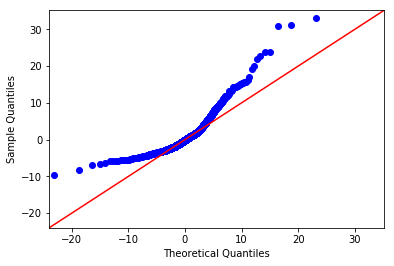

In [4]:
#QQplot

import pylab 
import scipy.stats as stats

residuals1 = model1.resid
fig = sm.qqplot(residuals1, stats.t, fit=True, line='45')
plt.show()

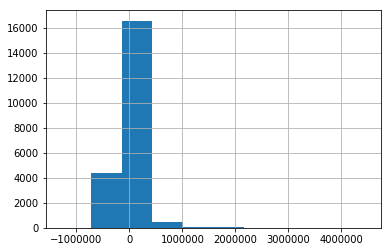

In [5]:
residuals1.hist()

In [22]:
df_fixed = df.loc[df['price'] < 1000000]

In [23]:

X = df_fixed[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'grade', 'sqft_living15', 'sqft_lot15', 'age']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_fixed['price']

X = sm.add_constant(X) # adding a constant

model2 = sm.OLS(Y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     2735.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        17:54:14   Log-Likelihood:            -2.6546e+05
No. Observations:               20107   AIC:                         5.309e+05
Df Residuals:                   20097   BIC:                         5.310e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.283e+05   1.04e+04    -60.130      0.000   -6.49e+05   -6.08e+05
sqft_living      60.8308      2.523     24.106      0.000      55.885      65.777
bedrooms      -1.312e+04   1306.389    -10.042      0.000   -1.57e+04   -1.06e+04
bathrooms      3.364e+04   2217.070     15.174      0.000    2.93e+04     3.8e+04
floors         3.774e+04   2168.725     17.401      0.000    3.35e+04     4.2e+04
sqft_lot          0.1388      0.033      4.243      0.000       0.075       0.203
grade           8.78e+04   1473.675     59.576      0.000    8.49e+04    9.07e+04
sqft_living15    53.5168      2.418     22.131      0.000      48.777      58.257
sqft_lot15       -0.2315      0.050     -4.637      0.000      -0.329      -0.134
age            2819.8720     42.103     66.975      0.000    2737.346    2902.398
==============================================================================
Omnibus:                      437.453   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.804
Skew:                           0.320   Prob(JB):                    3.98e-110
Kurtosis:                       3.437   Cond. No.                     5.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

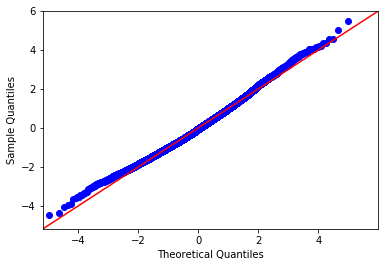

In [25]:
import pylab 
import scipy.stats as stats

residuals2 = model2.resid
fig = sm.qqplot(residuals2, stats.t, fit=True, line='45')
plt.show()

In [26]:
df_rich = df.loc[df['price'] > 3000000]

In [27]:
X = df_rich[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'grade', 'sqft_living15', 'sqft_lot15', 'age']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_rich['price']

X = sm.add_constant(X) # adding a constant

model3 = sm.OLS(Y, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     10.81
Date:                Mon, 06 May 2019   Prob (F-statistic):           8.40e-08
Time:                        17:54:56   Log-Likelihood:                -659.85
No. Observations:                  45   AIC:                             1340.
Df Residuals:                      35   BIC:                             1358.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.982e+05   1.31e+06      0.533      0.597   -1.96e+06    3.36e+06
sqft_living     467.3902     88.778      5.265      0.000     287.162     647.619
bedrooms      -1.272e+05   1.24e+05     -1.025      0.313   -3.79e+05    1.25e+05
bathrooms      1.312e+05   1.25e+05      1.051      0.301   -1.22e+05    3.85e+05
floors        -1.617e+04    2.3e+05     -0.070      0.944   -4.83e+05    4.51e+05
sqft_lot          1.6042     13.923      0.115      0.909     -26.661      29.869
grade         -4.131e+04   1.26e+05     -0.328      0.745   -2.97e+05    2.14e+05
sqft_living15    71.7566    171.723      0.418      0.679    -276.860     420.373
sqft_lot15       17.8768     16.182      1.105      0.277     -14.974      50.727
age            3469.7554   3772.810      0.920      0.364   -4189.457    1.11e+04
==============================================================================
Omnibus:                        1.518   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.266
Skew:                          -0.405   Prob(JB):                        0.531
Kurtosis:                       2.857   Cond. No.                     4.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

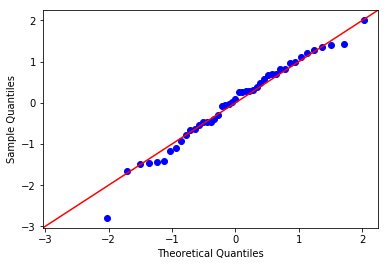

In [16]:
import pylab 
import scipy.stats as stats

residuals3 = model3.resid
fig = sm.qqplot(residuals3, stats.t, fit=True, line='45')
plt.show()

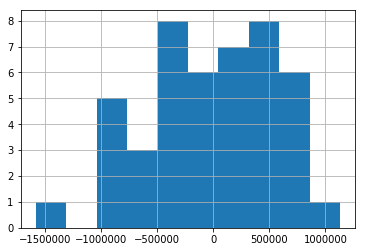

In [17]:
residuals3.hist()